<h1>Análisando algoritmos de ordenamiento</h1>

In [3]:
import math
import numpy as np
import pylab as pl
%matplotlib inline

<h2>Problema de ordenamiento</h2>

Input:  $A[1..n] = <a_1,a_2\ldots, a_n>$

Output: $A'[1..n] = <a'_1,a'_2\ldots, a'_n> : a'_1\leq a'_2 \leq \ldots \leq  a'_n$

<h3> Ordenamiento por inserción </h3>

In [4]:
def insertion_sort(A):
    j = 1
    while j < len(A):
        key = A[j]
        i = j - 1
        while (i >= 0) and (A[i] > key):
            A[i + 1] = A[i]
            i = i -1
        A[i + 1] = key
        j = j + 1

In [5]:
B = np.random.permutation(range(0,10))
print B
insertion_sort(B)
print B

[9 0 6 4 5 3 1 2 7 8]
[0 1 2 3 4 5 6 7 8 9]


<h4>Correctitud</h4>

<b>Invariante:</b> Al comienzo de cada iteración del ciclo externo el subarreglo $A[0..j-1]$ consiste de los elementos originalmente en $A[0..j-1]$ pero ordenados.

In [6]:
def invariant(A, original_A):
    l1 = list(A)
    l2 = list(original_A)
    l2.sort()
    return l1 == l2

In [7]:
print invariant([1, 2, 3, 4], [4, 3, 2, 1])
print invariant([1, 2, 3, 4], [5, 3, 2, 1])

True
False


Algoritmo de ordenamiento por inserción incluyendo evaluación de la invariante (inicialización, mantenimiento, terminación)

In [8]:
def right_insertion_sort(A):
    original_A = list(A)
    j = 1
    assert invariant(A[0:j], original_A[0:j])
    while j < len(A):
        assert invariant(A[0:j], original_A[0:j])
        key = A[j]
        i = j - 1
        while (i >= 0) and (A[i] > key):
            A[i + 1] = A[i]
            i = i -1        
        A[i + 1] = key
        j = j + 1
    assert invariant(A[0:j], original_A[0:j])

In [9]:
B = [5, 4, 6, 3, 7, 2, 8, 1, 9]
right_insertion_sort(B)
print B

[1, 2, 3, 4, 5, 6, 7, 8, 9]


La siguiente función incluye un error, por lo tanto la aserción para comprobar el invariante de ciclo falla. Esto genera una excepción que es capturada para imprimir un mensaje y el estado de las variables.

In [10]:
def wrong_insertion_sort(A):
    original_A = list(A)
    j = 1
    try:
        assert invariant(A[0:j], original_A[0:j])
        while j < len(A):
            assert invariant(A[0:j], original_A[0:j])
            key = A[j]
            i = j - 1
            while (i >= 0) and (A[i] < key):
                A[i + 1] = A[i]
                i = i - 1        
            A[i + 1] = key
            j = j + 1
        assert invariant(A[0:j], original_A[0:j])
    except  AssertionError:
        print "Error en el invariante de ciclo!"
        print "j=", j
        print "i=", i
        print "A=", A
        print "Original A=", original_A

In [11]:
B = [5, 4, 6, 3, 7, 2, 8, 1, 9]
wrong_insertion_sort(B)

Error en el invariante de ciclo!
j= 2
i= 0
A= [5, 4, 6, 3, 7, 2, 8, 1, 9]
Original A= [5, 4, 6, 3, 7, 2, 8, 1, 9]


<h4> Análisis del tiempo de ejecución</h4>

In [12]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps
        
def acct_insertion_sort(A, acct):
    j = 1; acct.count()
    acct.count()
    while j < len(A):
        acct.count()
        key = A[j]; acct.count()
        i = j - 1; acct.count()
        acct.count()
        while (i >= 0) and (A[i] > key):
            acct.count()
            A[i + 1] = A[i]; acct.count()
            i = i -1; acct.count()
        A[i + 1] = key; acct.count()
        j = j + 1; acct.count()

In [13]:
B = np.random.permutation(range(0,10))
acct = Counter()
acct_insertion_sort(B, acct)
acct.print_steps()

Number of steps = 128


<h4>Análisis experimental</h4>
Ahora vamos a analizar el comportamiento del algoritmo cuando el tamaño de la entrada varía. La siguiente función genera arreglos al azar de tamaño 1 a n, llama la función acct_insertion_sort(l, acct) y contabiliza el número de pasos.

In [14]:
import random as rnd

def exper_analysis(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        acct.reset()
        acct_insertion_sort(l, acct)
        results.append(acct.steps)
    return results

In [15]:
print exper_analysis(10)

[2, 2, 11, 20, 29, 50, 59, 74, 101, 92]


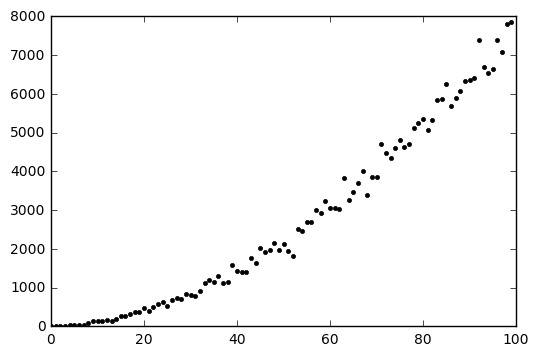

In [16]:
pl.clf()
x = np.arange(100)
y = np.array(exper_analysis(100))
pl.plot(x, y, 'k.')

#Actividad
 <ol>
  <li>En una sola gráfica represente el número de operaciones, tiempo y T(n) que el algoritmo de ordenamiento por inserción requiere para ordenar arreglos de tamaño n (varie n) en el peor de los casos.</li>
  <li>Replique los ejercicios realizados en este taller para el algoritmo de ordenamiento por mezclas (merge sort)</li>
  <li>Replique los ejercicios realizados en este taller para el algoritmo de ordenamiento quick-sort</li>
</ol> 

In [17]:
import time
tic = time.clock()#get start time
toc = time.clock()#get final time

<h4>QuickSort</h4>

In [9]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps

def quickSort(alist, acct):
   quickSortHelper(alist,0,len(alist)-1, acct)

def quickSortHelper(alist,first,last, acct):
   if first<last:

       splitpoint = partition(alist,first,last, acct)

       quickSortHelper(alist,first,splitpoint-1,acct)
       quickSortHelper(alist,splitpoint+1,last,acct)


def partition(alist,first,last,acct):
   pivotvalue = alist[first]; acct.count()

   leftmark = first+1; acct.count()
   rightmark = last; acct.count()

   done = False; acct.count()
   while not done:
       acct.count() 
       while leftmark <= rightmark and alist[leftmark] <= pivotvalue:
           acct.count() 
           leftmark = leftmark + 1; acct.count()

       while alist[rightmark] >= pivotvalue and rightmark >= leftmark:
           acct.count()
           rightmark = rightmark -1; acct.count()

       if rightmark < leftmark:
           acct.count()
           done = True; acct.count()
       else:
           acct.count()
           temp = alist[leftmark]; acct.count()
           alist[leftmark] = alist[rightmark]; acct.count()
           alist[rightmark] = temp; acct.count()

   temp = alist[first]; acct.count()
   alist[first] = alist[rightmark]; acct.count()
   alist[rightmark] = temp; acct.count()

   acct.count()
   return rightmark




In [10]:
alist = np.random.permutation(range(0,10))
acct = Counter()
print(alist)
quickSort(alist,acct)
acct.print_steps()
print(alist)

[2 7 3 0 1 8 9 4 6 5]
Number of steps = 147
[0 1 2 3 4 5 6 7 8 9]


<h4>Análisis experimental</h4>

In [11]:
import random as rnd

def exper_analysis(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        acct.reset()
        quickSort(l, acct)
        results.append(acct.steps)
    return results


In [12]:
print exper_analysis(10)

[0, 0, 13, 15, 35, 54, 65, 95, 105, 116]


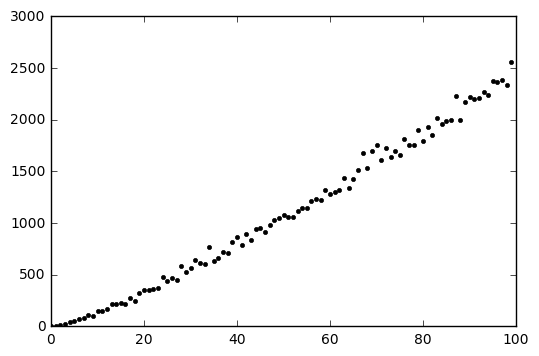

In [13]:
pl.clf()
x = np.arange(100)
y = np.array(exper_analysis(100))
pl.plot(x, y, 'k.')

<h4>Merge sort</h4>

In [17]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps
        
def mergeSort(alist, acct):

    if len(alist)>1:
        acct.count();
        mid = len(alist)//2; acct.count()
        lefthalf = alist[:mid]; acct.count()
        righthalf = alist[mid:]; acct.count()

        mergeSort(lefthalf, acct); acct.count()
        mergeSort(righthalf, acct); acct.count()

        i=0; acct.count()
        j=0; acct.count()
        k=0; acct.count()
        while i < len(lefthalf) and j < len(righthalf):
            acct.count()
            if lefthalf[i] < righthalf[j]:
                acct.count()
                alist[k]=lefthalf[i]; acct.count()
                i=i+1; acct.count()
            else:
                acct.count()
                alist[k]=righthalf[j]; acct.count()
                j=j+1; acct.count()
            k=k+1; acct.count()

        while i < len(lefthalf):
            acct.count()
            alist[k]=lefthalf[i]; acct.count()
            i=i+1; acct.count()
            k=k+1; acct.count()

        while j < len(righthalf):
            acct.count()
            alist[k]=righthalf[j]; acct.count()
            j=j+1; acct.count()
            k=k+1; acct.count()




In [18]:
alist = np.random.permutation(range(0,10))
acct = Counter()
print(alist)
mergeSort(alist, acct)
acct.print_steps()
print(alist)

[9 3 6 7 0 4 2 8 5 1]
Number of steps = 236
[0 0 0 0 0 1 1 1 1 1]


<h4>Análisis experimental</h4>

In [19]:
import random as rnd

def exper_analysis(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        acct.reset()
        mergeSort(l, acct)
        results.append(acct.steps)
    return results

In [20]:
print exper_analysis(10)

[0, 0, 18, 41, 63, 91, 120, 147, 176, 208]


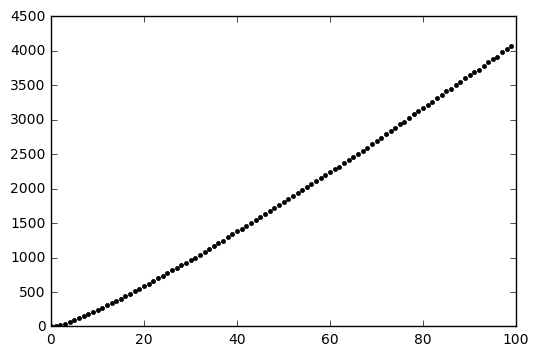

In [21]:
pl.clf()
x = np.arange(100)
y = np.array(exper_analysis(100))
pl.plot(x, y, 'k.')